# Language Translation (German to English)

**Problem Statement:**

The objective of the project is to implement language
translation model aka machine translation for converting
German to English (and vice versa)
For this, the data is a text file (.txt) of English-German sentence
pairs. The actual data contains over 150,000 sentence-pairs.
However, it is suggested to use only the first 50,000 sentence
pairs to reduce the training time of the model.

You can download the Data set from
http://www.manythings.org/anki/

**Language Translation (German to English)**

The computers’ emerging ability to understand and analyse
human language is Natural Language Processing. In general,
the steps involved are:
1. Pre-processing: Tokenization and UNK Replacement
2. Word Embeddings: Vectors and Dimension Reduction
3. Sequence to Sequence: Encoding and Decoding

Author @Tanushree Dhongale

In [ ]:
import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional, RepeatVector, TimeDistributed
from keras.preprocessing.text import Tokenizer
from keras. callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
% matplotlib inline
pd.set_option('display.max_colwidth', 200)

In [ ]:
# function to read raw text file
def read_text(filename):
    file = open(filename, mode='rt', encoding='utf-8')
    text = file.read()
    file.close()
    return text

In [ ]:
def to_lines(text):
    sents = text.strip().split('\n')
    sents = [i.split('\t') for i in sents]
    return sents

In [ ]:
data = read_text("deu.txt")
deu_eng = to_lines(data)
deu_eng = array(deu_eng)

In [ ]:
deu_eng = deu_eng[:5000,:]

In [ ]:
deu_eng

array([['Go.', 'Geh.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi.', 'Hallo!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi.', 'Grüß Gott!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ...,
       ['Tom looks OK.', 'Tom scheint okay zu sein.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2237301 (CK) & #6642335 (Felixjp)'],
       ['Tom loved it.', 'Tom liebte es.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #4394834 (CK) & #6642523 (Felixjp)'],
       ['Tom loved us.', 'Tom hat uns geliebt.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2237361 (CK) & #6642781 (Felixjp)']],
      dtype='<U537')

In [ ]:
eng_1 = []
deu_1 = []

# populate the list with sentence lengths
for i in deu_eng[:,0]:
    eng_1.append(len(i.split()))
    
for i in deu_eng[:,1]:
    deu_1.append(len(i.split()))

In [ ]:
length_df = pd.DataFrame({'eng':eng_1, 'deu':deu_1})

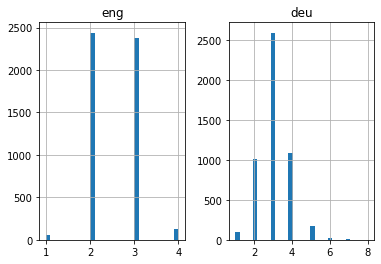

In [ ]:
length_df.hist(bins = 30)
plt.show()

In [ ]:
# Function to build a tokenizer
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [ ]:
eng_tokenizer = tokenization(deu_eng[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 8
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 1325


In [ ]:
deu_tokenizer = tokenization(deu_eng[:, 0])
deu_vocab_size = len(deu_tokenizer.word_index) + 1

deu_length = 8
print('Deutch Vocabulary Size: %d' % deu_vocab_size)

Deutch Vocabulary Size: 1325


In [ ]:
#encode and pad sequence
def encode_sequences(tokenizer, length, lines):
    #integer encode sequence
    seq = tokenizer.texts_to_sequences(lines)
    #pad sequence with 0 values
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(deu_eng, test_size=0.2, random_state = 12)

In [ ]:
trainX = encode_sequences(deu_tokenizer, deu_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])

In [ ]:
testX = encode_sequences(deu_tokenizer, deu_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])

In [ ]:
# building NMT model
def build_model(in_vocab, out_vocab, in_timesteps, out_timesteps, units):
    model = Sequential()
    model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
    model.add(LSTM(units))
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dense(out_vocab, activation='softmax'))
    return model

In [ ]:
model = build_model(deu_vocab_size, eng_vocab_size, deu_length, eng_length, 512)
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer = rms, loss = 'sparse_categorical_crossentropy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
filename = 'model.h1.24_tanushree'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                   epochs=5, batch_size=512,
                   validation_split = 0.2,
                   callbacks = [checkpoint], verbose=1)

Epoch 1/5
7/7 [==============================] - ETA: 0s - loss: 5.6133
Epoch 1: val_loss improved from inf to 3.01529, saving model to model.h1.24_tanushree


INFO:tensorflow:Assets written to: model.h1.24_tanushree/assets


INFO:tensorflow:Assets written to: model.h1.24_tanushree/assets


7/7 [==============================] - 45s 6s/step - loss: 5.6133 - val_loss: 3.0153
Epoch 2/5
7/7 [==============================] - ETA: 0s - loss: 2.7753
Epoch 2: val_loss improved from 3.01529 to 2.49186, saving model to model.h1.24_tanushree


INFO:tensorflow:Assets written to: model.h1.24_tanushree/assets


INFO:tensorflow:Assets written to: model.h1.24_tanushree/assets


7/7 [==============================] - 34s 5s/step - loss: 2.7753 - val_loss: 2.4919
Epoch 3/5
7/7 [==============================] - ETA: 0s - loss: 2.4347
Epoch 3: val_loss improved from 2.49186 to 2.38825, saving model to model.h1.24_tanushree


INFO:tensorflow:Assets written to: model.h1.24_tanushree/assets


INFO:tensorflow:Assets written to: model.h1.24_tanushree/assets


7/7 [==============================] - 35s 5s/step - loss: 2.4347 - val_loss: 2.3883
Epoch 4/5
7/7 [==============================] - ETA: 0s - loss: 2.3456
Epoch 4: val_loss improved from 2.38825 to 2.30362, saving model to model.h1.24_tanushree


INFO:tensorflow:Assets written to: model.h1.24_tanushree/assets


INFO:tensorflow:Assets written to: model.h1.24_tanushree/assets


7/7 [==============================] - 34s 5s/step - loss: 2.3456 - val_loss: 2.3036
Epoch 5/5
7/7 [==============================] - ETA: 0s - loss: 2.2666
Epoch 5: val_loss improved from 2.30362 to 2.24116, saving model to model.h1.24_tanushree


INFO:tensorflow:Assets written to: model.h1.24_tanushree/assets


INFO:tensorflow:Assets written to: model.h1.24_tanushree/assets


7/7 [==============================] - 34s 5s/step - loss: 2.2666 - val_loss: 2.2412


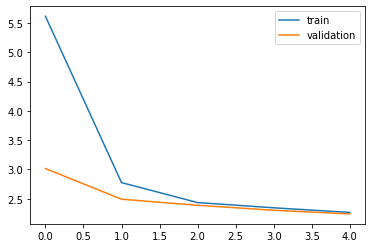

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model = load_model('model.h1.24_tanushree')
preds = model.predict(testX.reshape((testX.shape[0], testX.shape[1])))

In [ ]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

In [ ]:
# convert predictions into text (english)

preds_text = []
for i in preds:
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], eng_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], eng_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t)
                
        preds_text.append(' '.join(temp))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
a = {'actual' : test[:,0], 'predicted' : preds_text}
pred_df = pd.DataFrame.from_dict(a, orient='index')
pred_df = pred_df.transpose()

In [ ]:
pd.set_option('display.max_colwidth', 200)

In [ ]:
pred_df.head(15)

,actual,predicted
0,Let Tom come.,
1,Birds sing.,
2,Fix this.,
3,I'm free.,
4,Fix this.,
5,Tom is rude.,
6,I like it.,
7,"Fish, please.",
8,We must run.,
9,I'm not ugly.,
